# Predicting heart disease using machine learning
This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not a person has heart-disease?
## 2. Data

# create data dictionary

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

# 3. Evaluation
> If we can reach 95% accuracy the  we'll pursue the project

# 4. Features


## Preparing the tools

We're going to use pandas, matplotlib, and numpy for data analysis and manipulation

In [2]:
import sys;
!{sys.executable} -m pip install seaborn

In [3]:
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # we want our plots to appear inside the notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model for Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
df = pd.read_csv("data/heart-disease (1).csv")
df.shape

(303, 14)

# Data Exploration
1. What questions are u trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should u care about them?
5. How can u add, change or remove features to get more out of ur data?


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

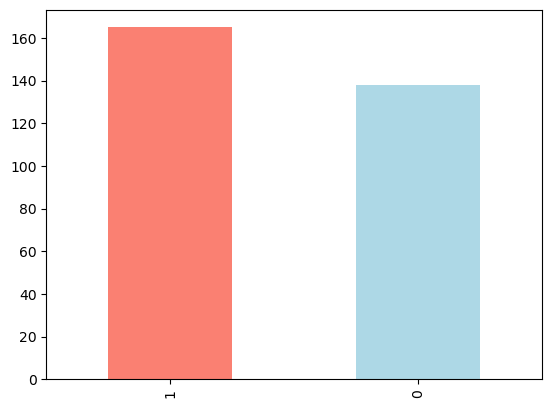

In [9]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

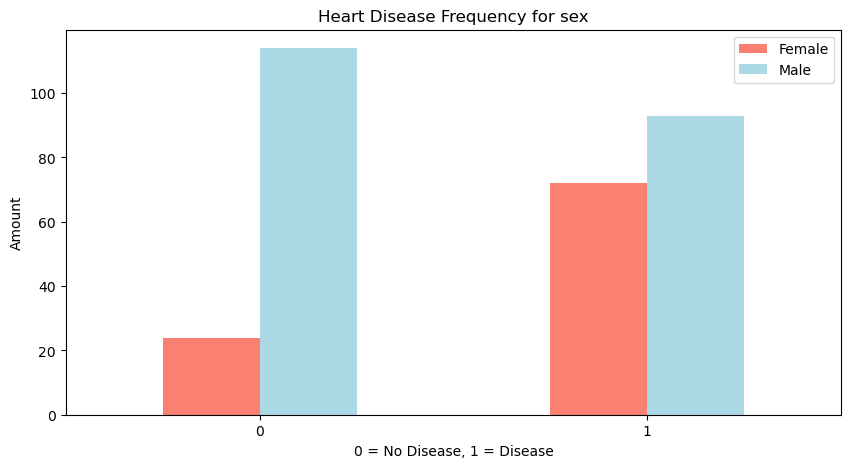

In [15]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,5),color = ["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

In [16]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [17]:
# Age vs. Max Heart disease

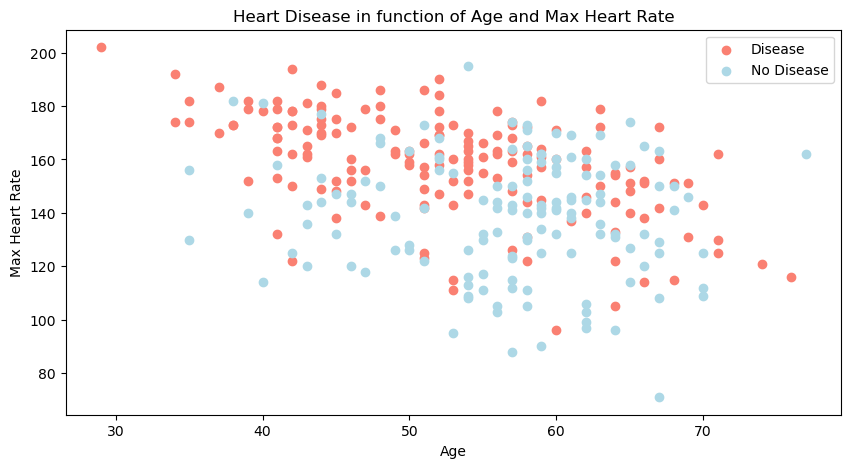

In [18]:
plt.figure(figsize = (10,5))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [19]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

<Axes: ylabel='Frequency'>

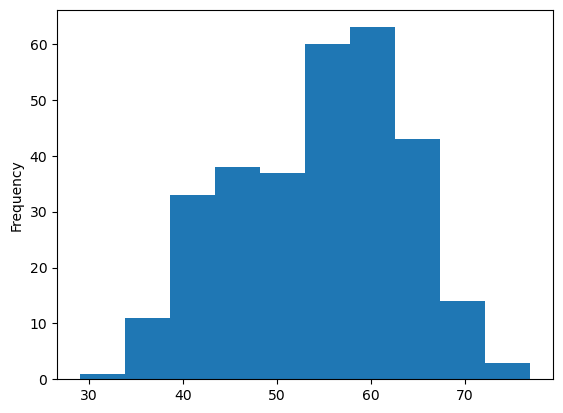

In [20]:


df.age.plot.hist()

## Heart Disease Frequency per chest pain type

In [21]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


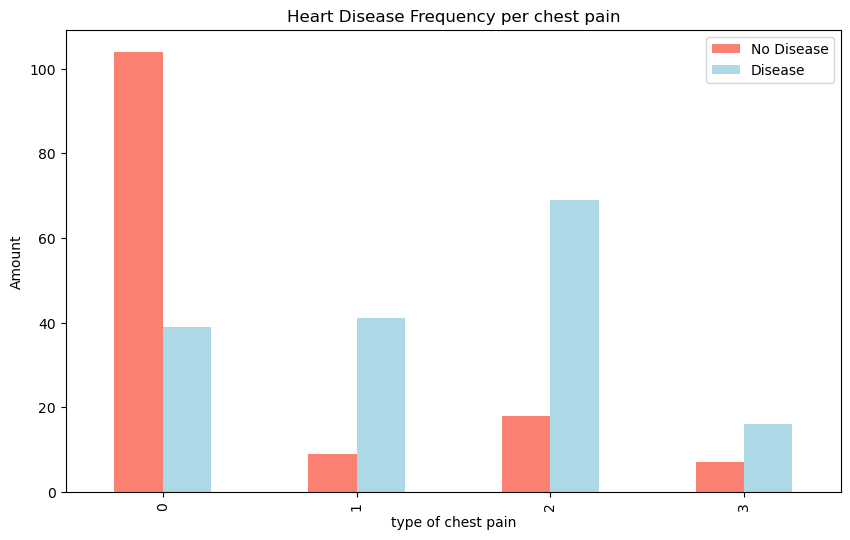

In [22]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per chest pain")
plt.xlabel("type of chest pain")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
## Make a Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


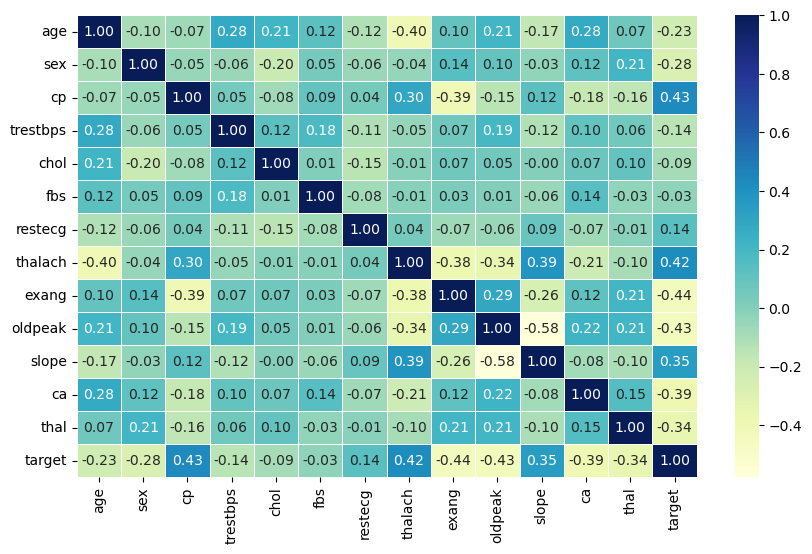

In [25]:
# Let's make correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix, annot =True,linewidths =0.5, fmt=".2f",cmap="YlGnBu");
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5)

# 5. Modelling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
x = df.drop("target",axis=1)
y = df["target"]

In [28]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# Split data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Build a machine learning model
#### We'll train it (find the patterns) on the training set.
#### And we'll test it (use the patterns) on the test set.
#### We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
from sklearn algorithm map

In [49]:
models = {"LogisticRegression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train,y_train,y_test):
    np.random.seed(34)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
model_scores = fit_and_score(models,x_train,y_train,y_test)
model_scores

C:\Users\DELL\Documents\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8524590163934426}

<Axes: >

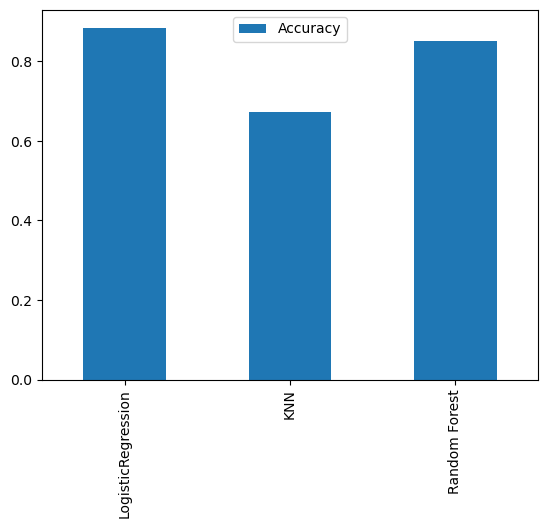

In [32]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar()

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve

### Hyper Parameter Tuning

In [34]:
# Tune KNN
train_scores =[]
test_scores =[]

#Create list of different values for n_neighbors
neighbors = range(1,21,1)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [35]:
train_scores

[1.0,
 0.7975206611570248,
 0.7768595041322314,
 0.7479338842975206,
 0.756198347107438,
 0.7355371900826446,
 0.7148760330578512,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.6942148760330579,
 0.7107438016528925,
 0.6818181818181818,
 0.6983471074380165,
 0.6818181818181818,
 0.6859504132231405,
 0.6900826446280992,
 0.6859504132231405]

In [38]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853]

Max KNN score on the test data : 72.13%


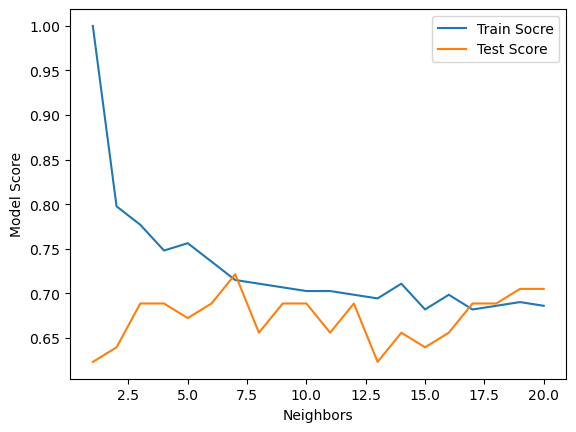

In [39]:
plt.plot(neighbors, train_scores,label="Train Socre")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Max KNN score on the test data : {max(test_scores)*100:.2f}%")

## HyperParameter Tuning using RandomizedSearchCV
We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... Using RandomizedSearchCV

In [58]:
# Create a hyperparameter grid for  LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
#Create a hyperparamater grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,100,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

#### Now we have got hyperparameter grids setup for each our models, let's tune it using RandomizedSearchCV

In [59]:
#Tune LogisticRegression
np.random.seed(3)
#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [60]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [61]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()..

In [62]:
np.random.seed(4)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                      param_distributions=rf_grid,
                      cv=5,
                      n_iter=20,
                      verbose=True)
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [63]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [64]:
rs_rf.score(x_test,y_test)

0.8688524590163934

 ## Hyperparameter tuning using GridSearchCV
 Since our LogisticRegression model provides the best scores so far, we'll try and improve them sgain using GridSearchCV..

In [68]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [69]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [70]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC socre
* Confusion matrix
* Classification Report
* Precision
* REcall
* F1-score

....and it would be great if cross-validation was used where possible

To make predictions and evaluate our trained model, first we need to make predicitons

In [73]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [76]:
# Plot ROC curve and calculate AUC metric
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)


NameError: name 'metrics' is not defined

In [ ]:
 y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
>>> display.plot()  
>>> plt.show()  

In [77]:
print(confusion_matrix(y_test,y_preds))

[[23  5]
 [ 2 31]]


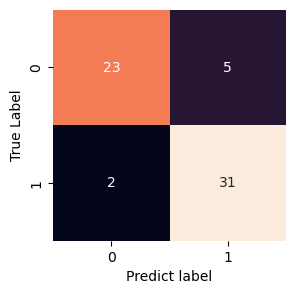

In [80]:
#sns.set(font_size=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predict label")
    plt.ylabel("True Label")
plot_conf_mat(y_test,y_preds)

In [81]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



### Calculate evaluation metrics using CrossValidation
We're going to calculate and accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [84]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [107]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver = "liblinear")

In [108]:
# Cross-validated accuracy
clf_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc = clf_acc.mean()

In [109]:
# Cross-validated precision
clf_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre = clf_pre.mean()

In [110]:
# cross-validated recall
clf_rec = cross_val_score(clf,x,y,scoring="recall",cv=5)
cv_rec=clf_rec.mean()

In [111]:
#Cross-validated f1 score
clf_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = clf_f1.mean()

<Axes: title={'center': 'Cross-Validation classification metrics'}>

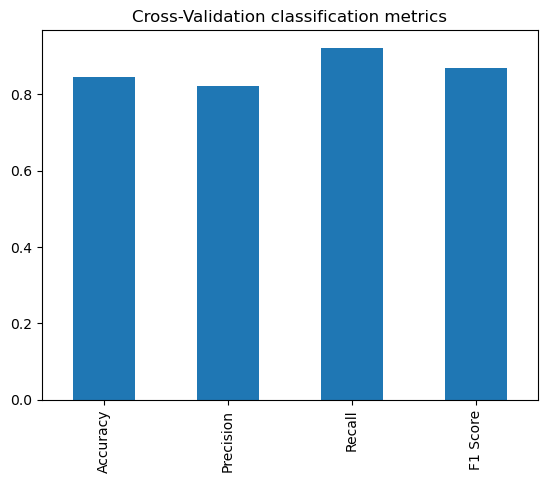

In [121]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pre,
                          "Recall":cv_rec,
                          "F1 Score":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title = "Cross-Validation classification metrics",
                     legend=False)

### Feature Importance
Which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for MODEL NAME feature importance

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [127]:
clf.coef_

array([[ 0.01021663, -0.84885626,  0.63401574, -0.0147763 , -0.0034486 ,
        -0.01086993,  0.21413971,  0.02956208, -0.51861622, -0.52050702,
         0.21932001, -0.62752766, -0.5929197 ]])

In [131]:
# Match Coefficients of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.01021662523692773,
 'sex': -0.8488562585189413,
 'cp': 0.6340157414177208,
 'trestbps': -0.014776302120513243,
 'chol': -0.0034485967508214575,
 'fbs': -0.010869929997219259,
 'restecg': 0.21413971151030511,
 'thalach': 0.02956208096197107,
 'exang': -0.5186162232097142,
 'oldpeak': -0.5205070202580531,
 'slope': 0.21932000827892184,
 'ca': -0.6275276566788516,
 'thal': -0.59291970120061}

<Axes: title={'center': 'Feature Importance'}>

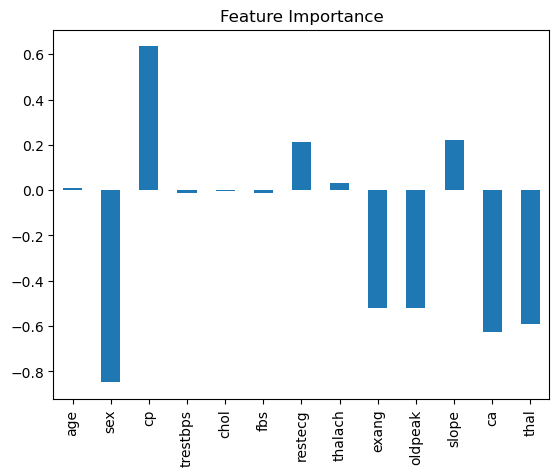

In [133]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

## 6. Experimentation
If u have'nt hit your evaluation metric yet..ask urself..
* could u collect more data?
* Could u try a better model? Like CatBoost or XGBoost?
* Could u improve th ecurrent models(beyond what we've done so far)
* If ur model is good enough (you have hit evaluation metric )
how would  u export it and share it with others?
                                     